<a href="https://colab.research.google.com/github/Yugank-102115185/102115185-SESS_LE1/blob/main/102115185_YugankGoel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Yugank Goel.**  
Email: `ygoel_be21@thapar.edu`  
Roll No: **102115185**  
Group: **4NC8**  
Start Timestamp: YYYYMMDD-HHMM  

## Question

Given the dimensionality d of inputs, a sequence H of channel size for each hidden layer, and number of classes C, define a function to

Take as argument a vector of raw inputs x;
Define a neural network classifier with d input channels, len(H) hidden layers, each subsequent layer bearing [h1,h2,...] channels finally resulting in C logits corresponding to each class;
Activate each intermediate layer with tanh
 activation; and
Return the logits.
The function shall be tested for consistency, correctness and efficiency as applicable.

Use PyTorch/Tensorflow for implementation. Use of internet resources is dicouraged in the interest of time, though not prohibited.

## Solution

In [2]:
from google.colab import files
!unzip new_voice_samples.zip -d /content/

Archive:  new_voice_samples.zip
   creating: /content/new_voice_samples/
   creating: /content/new_voice_samples/backward/
  inflating: /content/new_voice_samples/backward/yugank_backward01.wav  
  inflating: /content/new_voice_samples/backward/yugank_backward02.wav  
  inflating: /content/new_voice_samples/backward/yugank_backward03.wav  
  inflating: /content/new_voice_samples/backward/yugank_backward04.wav  
  inflating: /content/new_voice_samples/backward/yugank_backward05.wav  
  inflating: /content/new_voice_samples/backward/yugank_backward06.wav  
  inflating: /content/new_voice_samples/backward/yugank_backward07.wav  
  inflating: /content/new_voice_samples/backward/yugank_backward08.wav  
  inflating: /content/new_voice_samples/backward/yugank_backward09.wav  
  inflating: /content/new_voice_samples/backward/yugank_backward10.wav  
  inflating: /content/new_voice_samples/backward/yugank_backward11.wav  
  inflating: /content/new_voice_samples/backward/yugank_backward12.wav  
 

In [3]:
!wget http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz -O /content/speech_commands_v0.02.tar.gz

import tarfile
dataset_path = "/content/speech_commands_v0.02.tar.gz"
extracted_folder = "/content/speech_commands/"
with tarfile.open(dataset_path, "r:gz") as tar:
    tar.extractall(path=extracted_folder)

print("Dataset downloaded and extracted successfully!")

import os
print("Files in dataset directory:", os.listdir(extracted_folder))


--2024-09-11 07:39:25--  http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.101.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428923189 (2.3G) [application/gzip]
Saving to: ‘/content/speech_commands_v0.02.tar.gz’

/content/speech_com 100%[===================>]   2.26G  97.4MB/s    in 11s     

2024-09-11 07:39:36 (207 MB/s) - ‘/content/speech_commands_v0.02.tar.gz’ saved [2428923189/2428923189]

Dataset downloaded and extracted successfully!
Files in dataset directory: ['no', 'right', 'left', 'zero', 'seven', 'forward', 'six', '_background_noise_', 'two', 'wow', 'happy', 'four', 'one', 'down', 'sheila', 'learn', 'go', 'bed', 'validation_list.txt', 'yes', 'on', 'house', 'bird', '.DS_Store', 'nine', 'stop', 'three', 'up', 'dog', 'backward', 'testing_list.txt

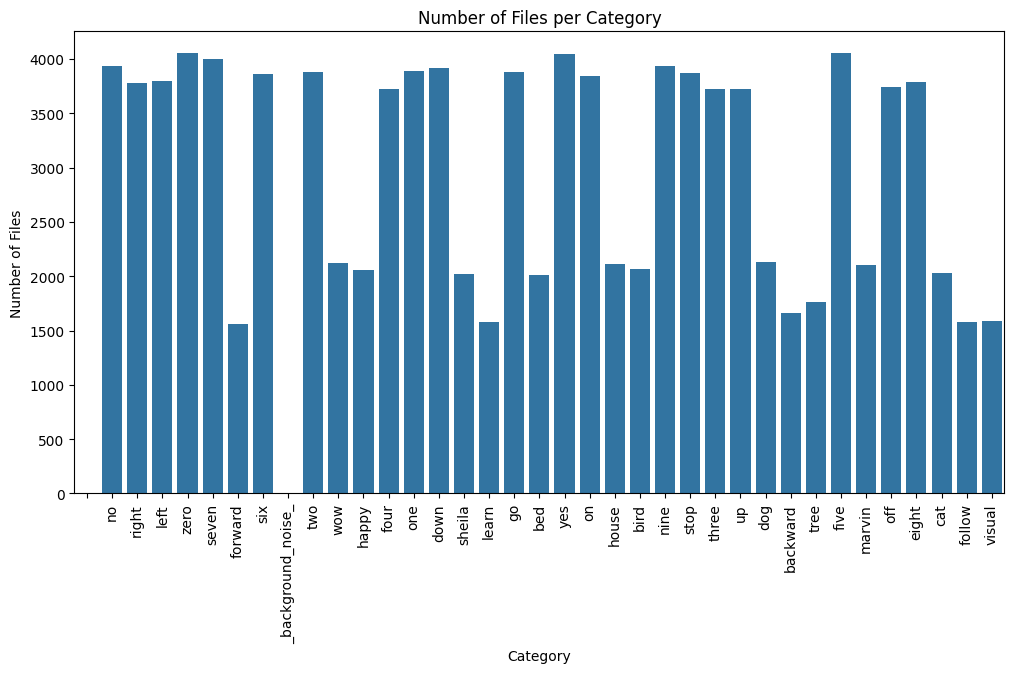

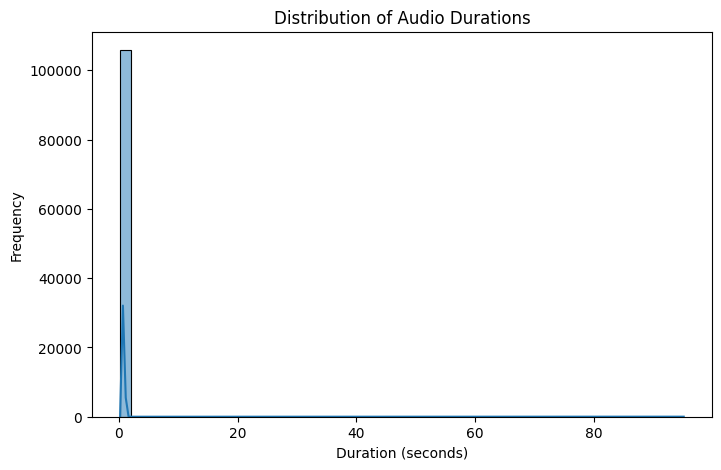

Number of unique speakers in the dataset: 2624
                    num_files  total_duration  avg_duration
zero                     4052     3999.233000      0.986978
five                     4052     3988.464312      0.984320
yes                      4044     3976.996625      0.983431
seven                    3998     3937.710313      0.984920
no                       3941     3862.685312      0.980128
nine                     3934     3874.341375      0.984835
down                     3917     3852.599938      0.983559
one                      3890     3808.148500      0.978958
go                       3880     3797.927125      0.978847
two                      3880     3808.606250      0.981600
stop                     3872     3812.173625      0.984549
six                      3860     3811.912000      0.987542
on                       3845     3775.348625      0.981885
left                     3801     3743.809437      0.984954
eight                    3787     3714.462312      0.

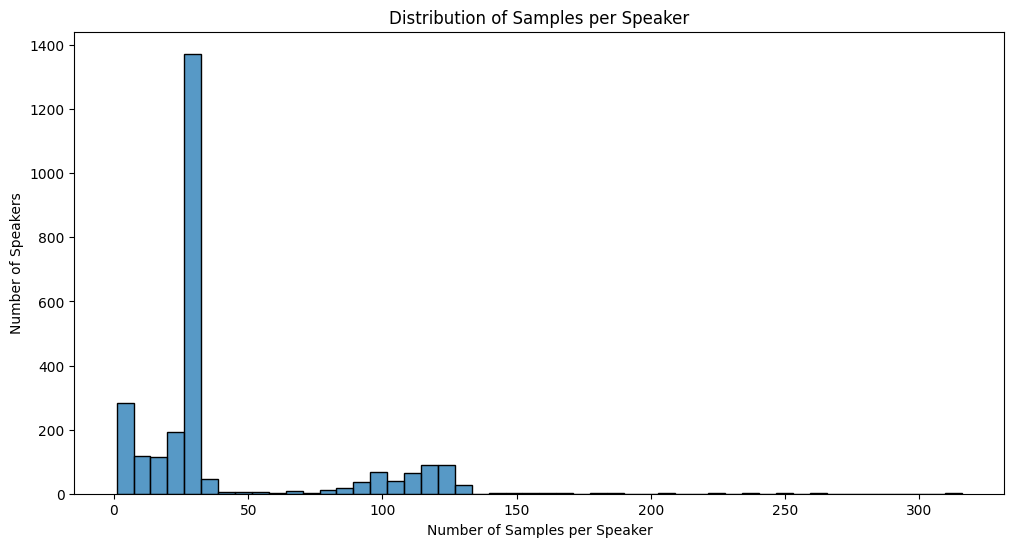

In [4]:
import os
import wave
import contextlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dataset_folder = "/content/speech_commands/"

categories = {}
speakers = set()
durations = []
def get_wav_duration(file_path):
    with contextlib.closing(wave.open(file_path, 'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        return frames / float(rate)

for root, dirs, files in os.walk(dataset_folder):
    category_name = os.path.basename(root)
    if len(files) > 0:
        if category_name not in categories:
            categories[category_name] = {
                "num_files": 0,
                "total_duration": 0.0
            }
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                categories[category_name]["num_files"] += 1
                duration = get_wav_duration(file_path)
                categories[category_name]["total_duration"] += duration
                durations.append(duration)

                speaker_id = file.split("_")[0]
                speakers.add(speaker_id)

df = pd.DataFrame.from_dict(categories, orient='index')
df['avg_duration'] = df['total_duration'] / df['num_files']

plt.figure(figsize=(12,6))
sns.barplot(x=df.index, y=df['num_files'])
plt.xticks(rotation=90)
plt.title("Number of Files per Category")
plt.xlabel("Category")
plt.ylabel("Number of Files")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(durations, bins=50, kde=True)
plt.title("Distribution of Audio Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()


print(f"Number of unique speakers in the dataset: {len(speakers)}")

df = df.sort_values(by="num_files", ascending=False)
print(df)

speaker_count = [file.split("_")[0] for root, _, files in os.walk(dataset_folder) for file in files if file.endswith(".wav")]
speaker_df = pd.DataFrame(speaker_count, columns=["Speaker"])
speaker_count_df = speaker_df['Speaker'].value_counts()

plt.figure(figsize=(12,6))
sns.histplot(speaker_count_df, kde=False, bins=50)
plt.title("Distribution of Samples per Speaker")
plt.xlabel("Number of Samples per Speaker")
plt.ylabel("Number of Speakers")
plt.show()


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
import librosa
from sklearn.model_selection import train_test_split

dataset_folder = "/content/speech_commands/"

def load_audio_file(file_path):
    y, sr = librosa.load(file_path, sr=16000)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc = np.mean(mfcc.T, axis=0)
    return mfcc

X = []
y = []
labels = os.listdir(dataset_folder)
label_to_index = {label: i for i, label in enumerate(labels)}

for label in labels:
    label_folder = os.path.join(dataset_folder, label)
    if os.path.isdir(label_folder):
        for file in os.listdir(label_folder):
            if file.endswith('.wav'):
                file_path = os.path.join(label_folder, file)
                mfcc = load_audio_file(file_path)
                X.append(mfcc)
                y.append(label_to_index[label])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Input(shape=(40,)),
    layers.Reshape((40, 1)),
    layers.Conv1D(32, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(labels), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

model.save("/content/speech_command_classifier.h5")


Epoch 1/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.1606 - loss: 3.3642 - val_accuracy: 0.2541 - val_loss: 2.5961
Epoch 2/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2682 - loss: 2.5305 - val_accuracy: 0.2779 - val_loss: 2.5018
Epoch 3/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2982 - loss: 2.4164 - val_accuracy: 0.2833 - val_loss: 2.4670
Epoch 4/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3181 - loss: 2.3517 - val_accuracy: 0.2956 - val_loss: 2.4195
Epoch 5/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3299 - loss: 2.2826 - val_accuracy: 0.2892 - val_loss: 2.4322
Epoch 6/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3379 - loss: 2.2581 - val_accuracy: 0.3078 - val_loss: 2.3862
Epoch 7/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3536 - loss: 2.2058 - val_accuracy: 0.3031 - val_loss: 2.4009
Epoch 8/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3535 - loss: 2.1893 -

Test Accuracy: 0.32


In [16]:
model = models.Sequential([
    layers.Input(shape=(40,)),
    layers.Reshape((40, 1)),

    # First Conv1D Layer
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),

    # Second Conv1D Layer
    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),

    # Third Conv1D Layer
    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),

    # Dropout to reduce overfitting
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.Dense(len(labels), activation='softmax')
])

# Compile the updated model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Save the trained model
model.save("/content/updated_speech_command_classifier.h5")

Epoch 1/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1540 - loss: 3.0352 - val_accuracy: 0.2435 - val_loss: 2.5970
Epoch 2/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2479 - loss: 2.5866 - val_accuracy: 0.2706 - val_loss: 2.5078
Epoch 3/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2777 - loss: 2.4878 - val_accuracy: 0.2719 - val_loss: 2.5133
Epoch 4/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2979 - loss: 2.4095 - val_accuracy: 0.2917 - val_loss: 2.4136
Epoch 5/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3102 - loss: 2.3473 - val_accuracy: 0.3019 - val_loss: 2.3744
Epoch 6/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3239 - loss: 2.2966 - val_accuracy: 0.3116 - val_loss: 2.3568
Epoch 7/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3332 - loss: 2.2560 - val_accuracy: 0.3099 - val_loss: 2.3480
Epoch 8/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3472 - loss: 2.2079 -

Test Accuracy: 0.33


In [ ]:
new_dataset_folder = "/content/new_voice_samples/"

def load_new_audio_file(file_path):
    y, sr = librosa.load(file_path, sr=16000)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc = np.mean(mfcc.T, axis=0)
    return mfcc

X_new = []
y_new = []
new_labels = os.listdir(new_dataset_folder)
new_label_to_index = {label: i for i, label in enumerate(new_labels)}

for label in new_labels:
    label_folder = os.path.join(new_dataset_folder, label)
    if os.path.isdir(label_folder):
        for file in os.listdir(label_folder):
            if file.endswith('.wav'):
                file_path = os.path.join(label_folder, file)
                mfcc = load_new_audio_file(file_path)
                X_new.append(mfcc)
                y_new.append(new_label_to_index[label])

X_new = np.array(X_new)
y_new = np.array(y_new)



In [21]:
model = tf.keras.models.load_model("/content/speech_command_classifier.h5")

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_new, y_new, epochs=5, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Fine-tuned Model Test Accuracy: {test_acc:.2f}")

model.save("/content/fine_tuned_speech_command_classifier.h5")


Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.0586 - loss: 7.0802 - val_accuracy: 0.0000e+00 - val_loss: 4.7822
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1179 - loss: 3.3647 - val_accuracy: 0.0000e+00 - val_loss: 7.8783
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3595 - loss: 2.6469 - val_accuracy: 0.0000e+00 - val_loss: 9.5766
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5368 - loss: 1.7972 - val_accuracy: 0.0044 - val_loss: 12.4507
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7152 - loss: 1.0926 - val_accuracy: 0.0088 - val_loss: 16.7100
662/662 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0964 - loss: 4.7938


Fine-tuned Model Test Accuracy: 0.10


## Test Case

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy after Fine-tuning: {test_acc:.2f}")


662/662 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0964 - loss: 4.7938
Final Test Accuracy after Fine-tuning: 0.10


In [23]:
predictions = model.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)


for i in range(5):
    print(f"Predicted: {predicted_labels[i]}, True: {y_test[i]}")


662/662 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted: 20, True: 25
Predicted: 9, True: 3
Predicted: 14, True: 37
Predicted: 6, True: 26
Predicted: 16, True: 39
